In [1]:
import artifact2
import char2
import damage

from solvers.Top1 import Top1
from solvers.TopPerc import TopPerc
from util.common import statnames, statmap, slotnames, make_stats

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

%matplotlib inline
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (16,9)
matplotlib.rcParams['savefig.bbox'] = 'tight'

In [3]:
import random
import itertools

In [26]:
n=100_000
rvec = np.random.random((n, 13))
rvec[:,0] = 0.1
cmp1 = [artifact2.make_from_rvec(rv, sort=False) for rv in rvec]
cmp2 = [artifact2.make_arti(slot=0, sort=False) for _ in range(n)]

In [34]:
%timeit [artifact2.make_from_rvec(rv, sort=False) for rv in rvec]

4.84 s ± 402 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
u1, c1 = np.unique([c.main_stat for c in cmp1], return_counts=True)
u2, c2 = np.unique([c.main_stat for c in cmp2], return_counts=True)

In [28]:
sinv1 = np.array([c.subs for c in cmp1])
sinv1

array([[2, 5, 9, 3],
       [3, 9, 5, 4],
       [0, 8, 3, 2],
       ...,
       [4, 5, 3, 2],
       [9, 3, 5, 8],
       [3, 2, 8, 4]])

In [29]:
sinv2 = np.array([c.subs for c in cmp2])
sinv2

array([[3, 9, 2, 6],
       [5, 7, 2, 4],
       [5, 9, 7, 2],
       ...,
       [7, 8, 0, 5],
       [0, 4, 3, 5],
       [3, 5, 8, 9]])

In [30]:
u1,c1 = np.unique(sinv1, return_counts=True)
u1, c1

(array([0, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([43148, 43236, 57743, 43293, 57811, 33971, 34077, 43393, 43328]))

In [31]:
u2,c2 = np.unique(sinv2, return_counts=True)
u2, c2

(array([0, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([42788, 43056, 57763, 43088, 58077, 34340, 34339, 43446, 43103]))

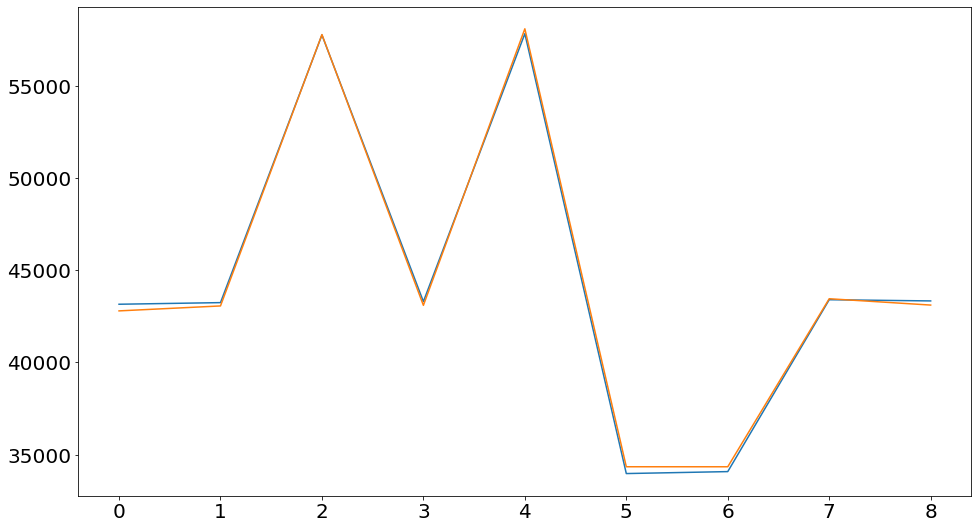

In [32]:
plt.plot(c1)
plt.plot(c2)

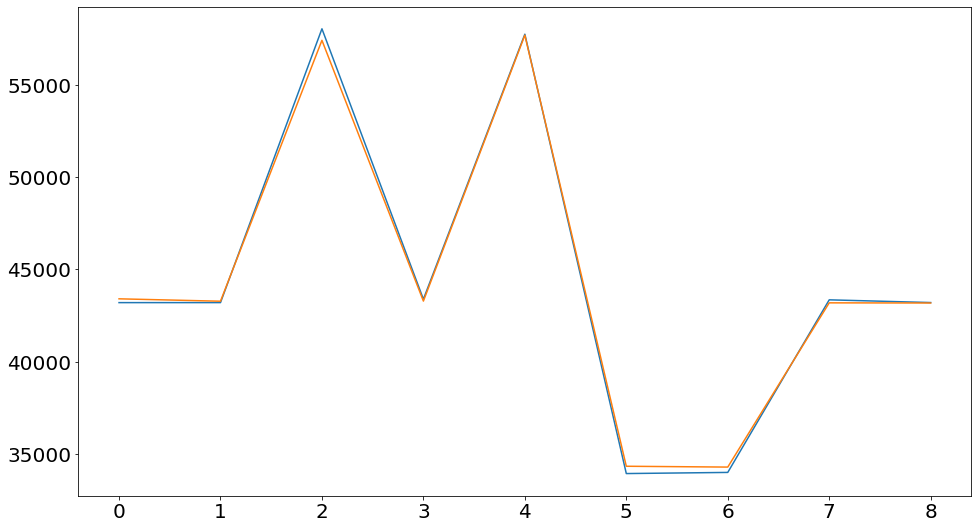

In [24]:
plt.plot(c1)
plt.plot(c2)
# plt.plot(np.array([4,4,6,4,6,3,3,4,4])/38*10_0000)

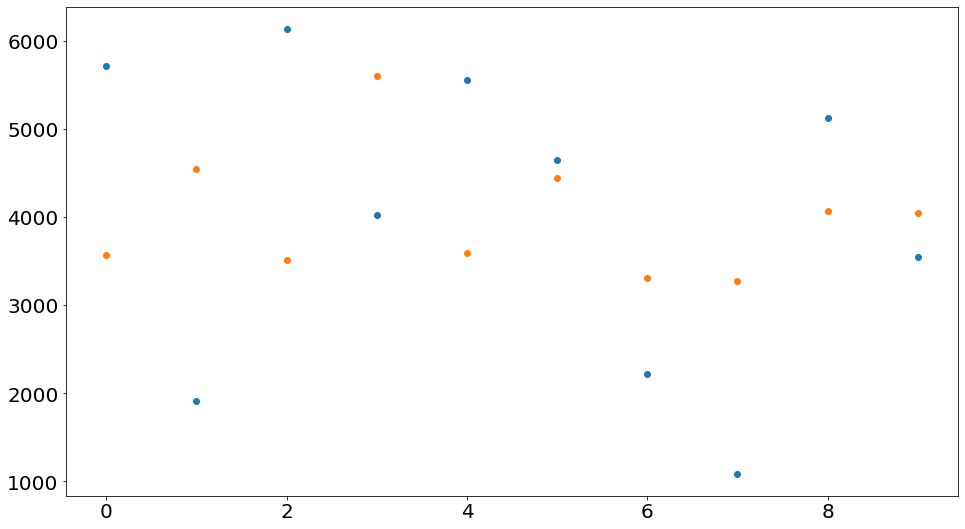

In [33]:
plt.scatter(u1, c1)
plt.scatter(u2, c2)

In [34]:
keyset = {}
for i in range(5):
    for ks in itertools.combinations(sorted(artifact2.substat.k), i):
        lmao = artifact2.substat
        for k in ks:
            lmao = lmao.remove(k)
        keyset[ks] = lmao


In [8]:
tuple(sorted({'DEF','ATK','HP%'}))

('ATK', 'DEF', 'HP%')

In [45]:
keyset[('ATK','ATK%','EM')].cum

array([ 6, 12, 16, 20, 24, 27, 30])

In [20]:
%timeit np.random.random(11)

1.75 µs ± 143 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [21]:
%timeit [random.random() for _ in range(11)]

1.8 µs ± 107 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
%timeit [artifact2.make_arti(slot=0, sort=True) for _ in range(1000)]

190 ms ± 19.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [98]:
distr = (np.random.random(2_000_000)*5).astype(int)
np.unique(distr, return_counts=True)

(array([0, 1, 2, 3, 4]), array([399986, 400739, 399148, 399914, 400213]))

In [87]:
np.random.randint([0, 0, 0], [10, 5, 7], size=(10,3))

array([[3, 3, 6],
       [6, 1, 2],
       [5, 2, 2],
       [1, 0, 2],
       [2, 2, 1],
       [7, 3, 6],
       [7, 2, 5],
       [2, 2, 2],
       [4, 0, 6],
       [3, 2, 0]])

In [71]:
%timeit np.random.randint(20, size=1_000_000)

18.8 ms ± 931 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [75]:
import random

In [79]:
%timeit [random.randint(0,20) for _ in range(1_000_000)]

1.13 s ± 38.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
%prun [artifact2.make_arti(slot=0, sort=True) for _ in range(1000)]

         199769 function calls in 0.262 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     5000    0.033    0.000    0.033    0.000 {method 'randint' of 'numpy.random.mtrand.RandomState' objects}
     1000    0.023    0.000    0.255    0.000 artifact2.py:64(make_arti)
     5000    0.022    0.000    0.022    0.000 {method 'argmax' of 'numpy.ndarray' objects}
     5000    0.022    0.000    0.099    0.000 sampler.py:16(get)
     4000    0.014    0.000    0.041    0.000 fromnumeric.py:39(_wrapit)
     4000    0.013    0.000    0.013    0.000 {built-in method numpy.array}
     4000    0.012    0.000    0.074    0.000 sampler.py:4(__init__)
     9000    0.012    0.000    0.078    0.000 fromnumeric.py:52(_wrapfunc)
     4000    0.012    0.000    0.012    0.000 {method 'cumsum' of 'numpy.ndarray' objects}
    12444    0.011    0.000    0.016    0.000 random.py:238(_randbelow_with_getrandbits)
     5000    0.010    0.000    0.085 

In [8]:
a.subvals[2]

28

In [19]:
10 / (.389*2)

12.853470437017995

In [51]:
slot = 0
ms = 'HP'
crit = {
    'EM': 12,
}
for k,v in crit.items():
    print(f'{k} >= {v*artifact2.sub_vals[k]/10}')
def pred(a):
    if a.slot != slot:
        return False
    if a.main_stat != statmap[ms]:
        return False
    for k, v in crit.items():
        s = statmap[k]
        if s not in a.subs:
            return False
        
        si = a.subs.index(s)
        if a.subvals[si] < v:
            return False
    return True


def keke(n=100):
    c = 0
    aas = []
    for _ in range(n):
        a = artifact2.make_arti(slot=None, sort=True)
        aas.append(a)
        if pred(a):
            c += 1
    return c / n, aas

EM >= 27.971999999999998


In [59]:
2**20

1048576

In [60]:
loost = [artifact2.make_arti() for _ in range(2**20)]

In [63]:
np.count_nonzero([pred(z) for z in loost]) / 2**20

0.06035614013671875

In [3]:
make_stats({'BaseHP': 9570, 'BaseDEF': 601, 'BaseATK': 212+510, 'ATK%': 413, 'CR': 50, 'CD': 500, 'Cryo': 240})

array([   0.,    0.,    0.,    0.,  413.,    0.,   50.,  500.,    0.,
          0.,    0.,    0.,    0.,    0.,  240.,    0.,    0.,    0.,
          0., 9570.,  601.,  722.])

In [8]:
# testing using my diona
diona = make_stats({
    'BaseHP': 9570, 'BaseDEF': 601, 'BaseATK': 212+510,
    'ATK%': 413, 'CR': 50, 'CD': 500, 'Cryo': 240}
)
diona = [
    0, 0,
    0, 0,
    413, 0,
    50, 500,
    0, 0,
    0, 0, 0, 0, 240, 0, 0, 0, 0,
    9570,601,212+510,
]
diona = np.array(diona)
formula = damage.NormalDmg(2, elem='Cryo') + damage.NormalDmg(.67, elem='Cryo') + damage.NormalDmg(.2)
c = char2.Character(diona, formula)

flower = artifact2.Artifact(0, statmap['HP'],
            (statmap['ATK'], statmap['DEF'], statmap['EM'], statmap['CD']),
            (17, 7, 35, 18),
            (8, 7, 8, 9))
feather = artifact2.Artifact(1, statmap['ATK'],
            (statmap['ER'], statmap['DEF'], statmap['CD'], statmap['CR']),
            (25, 16, 25, 8),
            (9, 8, 9, 8))
sands = artifact2.Artifact(2, statmap['EM'],
            (statmap['DEF'], statmap['CD'], statmap['CR'], statmap['HP']),
            (17, 10, 32, 18),
            (9, 10, 8, 9))
goblet = artifact2.Artifact(3, statmap['Cryo'],
            (statmap['ATK%'], statmap['ER'], statmap['EM'], statmap['HP%']),
            (19, 34, 7, 8),
            (10, 8, 7, 8))
circl = artifact2.Artifact(4, statmap['CD'],
            (statmap['DEF%'], statmap['ER'], statmap['ATK%'], statmap['DEF']),
            (26, 8, 16, 16),
            (8, 8, 8, 8))

In [9]:
ll = char2.Loadout([flower, feather, sands, goblet, circl])

In [10]:
c.equip(ll)

In [19]:
c._bake_stats()[statmap['ATK']] + c._bake_stats()[statmap['BaseATK']] * c._bake_stats()[statmap['ATK%']] / 1000

789.5751

In [42]:
diona[statmap['BaseATK']]

722

In [3]:
diona = [
    0, 0,
    0, 0,
    0, 0,
    50, 500 + 469,
    0, 0,
    0, 0, 0, 0, 240, 0, 0, 0, 0,
    9570,601,212+401,
]
diona = np.array(diona)
formula = damage.NormalDmg(2, elem='Cryo') + damage.NormalDmg(.67, elem='Cryo') + damage.NormalDmg(.2)
c = char2.Character(diona, formula)

In [4]:
def dorun(n=120):
    slv = Top1(diona, formula)
    for i, a in enumerate(artifact2.ArtifactGenerator()):
        slv.step(a)
        if i > n:
            break
    return slv

def dorun2(n=120):
    slv = TopPerc(diona, formula)
    for i, a in enumerate(artifact2.ArtifactGenerator()):
        slv.step(a)
        if i > n:
            break
    return slv

In [14]:
z = dorun()

In [26]:
z.c.artis.artis

(HP Flower@(DEF%:9>29, DEF:10>10, ATK%:7>30, ATK:8>8),
 ATK Feath@(HP:9>9, DEF:9>33, ATK%:10>28, CR:10>10),
 ATK% Sands@(HP:7>7, ATK:9>18, CD:0>26, ER:10>19),
 Cryo Cup@(HP:9>17, DEF%:9>9, DEF:0>26, ATK:9>18),
 ATK% Hat@(HP%:0>22, ATK:8>26, CR:7>7, EM:7>7))

In [33]:
z.c._bake_stats()[statmap['Cryo']]

706.0

In [5]:
s1 = Top1(diona, formula)
s2 = TopPerc(diona, formula)
for i, a in enumerate(artifact2.ArtifactGenerator()):
    s1.step(a)
    s2.step(a)
    if i > 100:
        break

TypeError: _lambdifygenerated() missing 1 required positional argument: 'baseatk'

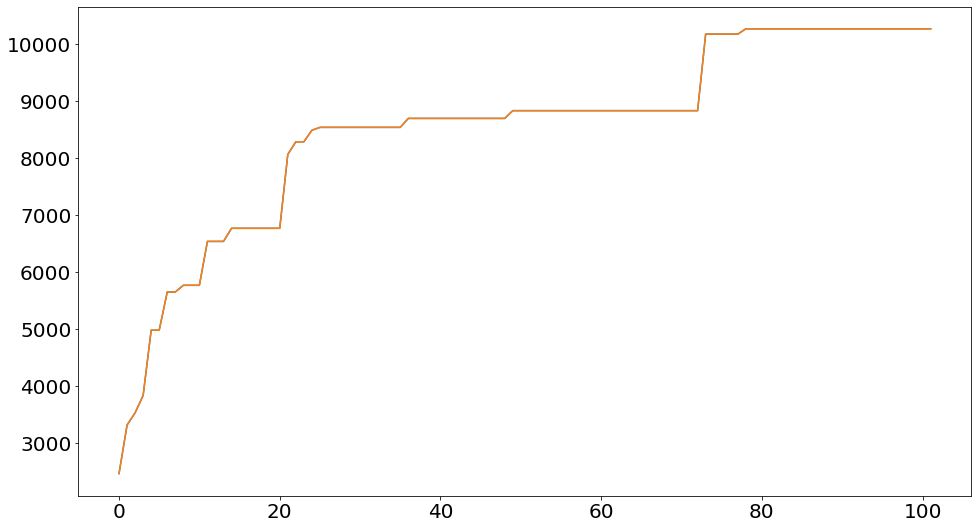

In [6]:
plt.plot(s1.dmg_record)
plt.plot(s2.dmg_record)

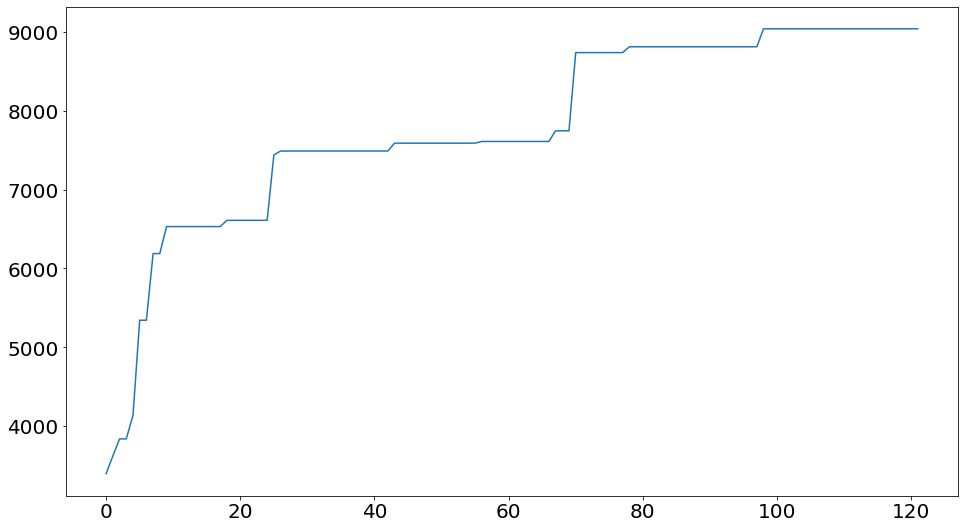

In [6]:
# plt.plot(dorun().dmg_record)
plt.plot(dorun2().dmg_record)

In [90]:
solfs2 = [dorun(120) for _ in range(100)]
pz2 = np.array(list(map(lambda z: z.dmg_record, solfs2)))

In [59]:
solfs = [dorun(120) for _ in range(100)]

In [61]:
plots = list(map(lambda z: z.dmg_record, solfs))

In [71]:
solfs[1].c.artis

[HP Flower@(DEF:10>17, ATK%:7>35, ATK:0>10, EM:8>8),
 ATK Feath@(DEF%:7>7, ATK%:8>28, CR:9>25, ER:0>10),
 ATK% Sands@(DEF%:9>9, DEF:0>10, ATK:7>34, CD:8>17),
 Cryo Cup@(DEF:10>18, ATK:8>25, CR:7>17, EM:0>7),
 CR Hat@(HP:8>16, DEF:0>8, ATK%:10>29, EM:9>17)]

In [79]:
solfs[8].c.artis

[HP Flower@(HP%:8>8, DEF:8>8, ATK%:7>40, ER:7>14),
 ATK Feath@(HP:7>16, ATK%:7>25, ER:0>18, EM:10>10),
 ATK% Sands@(DEF:7>7, ATK:7>25, ER:0>8, EM:10>25),
 Cryo Cup@(ATK%:9>33, ATK:0>16, CR:8>8, EM:7>7),
 CR Hat@(HP:8>8, DEF:7>26, ATK:8>25, CD:9>17)]

In [85]:
solfs[8].c._bake_stats()[statmap['ATK']]

1688.2594199999999

In [63]:
pz = np.array(plots)

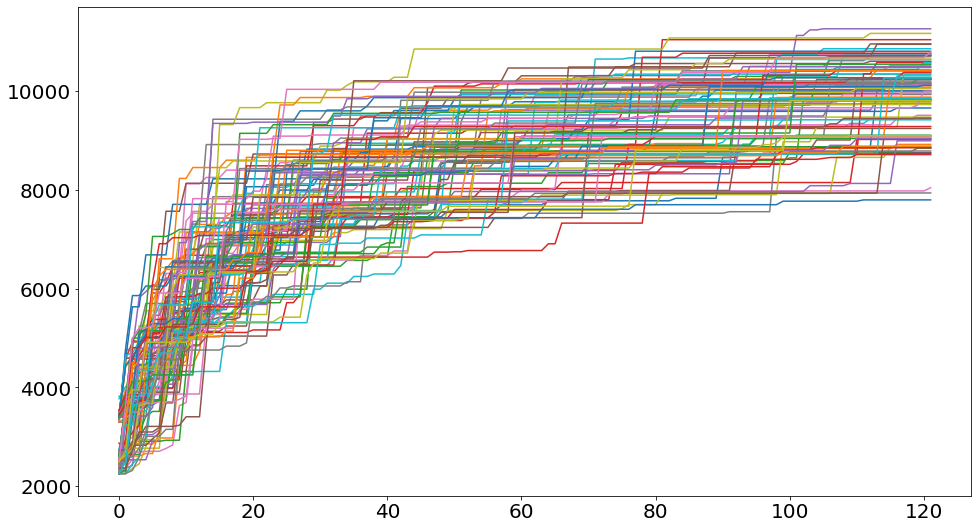

In [91]:
plt.plot(pz2.T)
pass

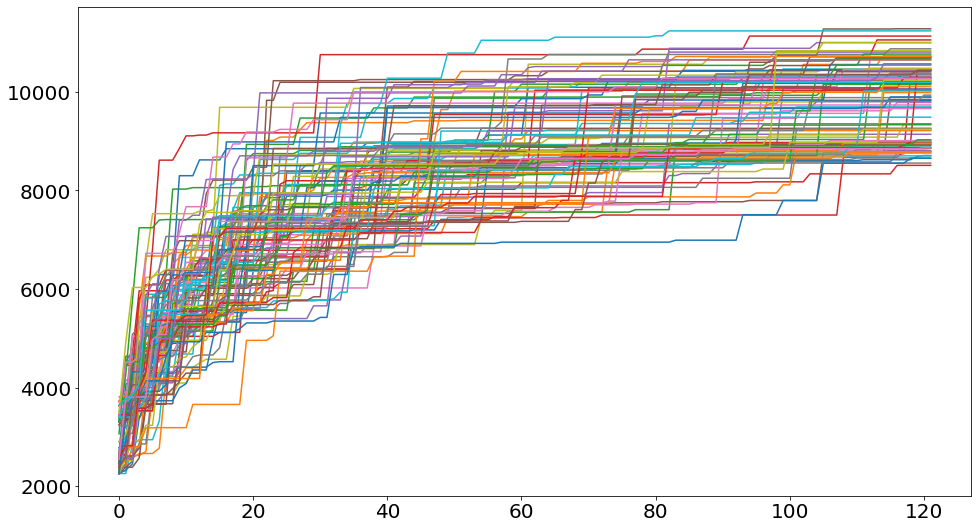

In [93]:
plt.plot(pz.T)
pass

In [10]:
slv.c.artis

[HP Flower@(DEF:7>7, ATK%:8>45, ATK:9>16, ER:8>8),
 ATK Feath@(DEF:8>8, ATK%:8>42, CD:7>7, EM:10>20),
 ATK% Sands@(HP%:9>9, DEF:9>9, ATK:8>49, CD:8>8),
 Cryo Cup@(HP:10>10, DEF:8>15, ATK%:9>39, ER:0>7),
 CR Hat@(HP%:7>7, ATK%:9>39, ATK:8>16, CD:8>16)]

In [23]:
slv.c._bake_stats()[statmap['CR']]

0.36107002

In [6]:
i, a

(0, HP Flower@(HP%:8>16, DEF:0>15, ATK:8>16, CD:8>18))